# Tutorial 7- Image Processing with Python

[![View notebook on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/avakanski/Fall-2023-Python-Programming-for-Data-Science/blob/main/docs/Lectures/Theme_3-Model_Engineering/Tutorial_7-Image_Processing/Tutorial_7-Image_Processing.ipynb)
[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/avakanski/Fall-2023-Python-Programming-for-Data-Science/blob/main/docs/Lectures/Theme_3-Model_Engineering/Tutorial_7-Image_Processing/Tutorial_7-Image_Processing.ipynb)

<a id='top'></a>

A **digital image** is a digital or electronic representation of a visual scene or object, typically constructed from a grid of individual picture elements, referred to as *pixels*. Each pixel represents a tiny square or point, that stores data related to the color and luminance of a particular location within the image. Digital images serve diverse purposes across many applications, encompassing photography, graphic design, video games, medical imaging, and other fields.

**Digital image processing** is the computational approach for the analysis, storage, and interpretation of digital content. In modern times, the impact of image processing has expanded to include many fields ranging from medical diagnostics to autonomous navigation.

Popular libraries for digital image processing include Pillow, OpenCV, and Scikit-image.

## Python Image Processing with Pillow

**Pillow** is a popular library for performing advanced image processing tasks that do not require extensive expertise in the field. It is also commonly employed for initial experimentation with image-related tasks. Additionally, Pillow benefits from its widespread adoption within the Python community and offers a more gentle learning curve compared to some of the more complex image processing libraries.

To install  Pillow in Python use:

    pip install pillow

### Load and Display an Image with Pillow

The methods `open()` and `load()` are used for loading images in Pillow.

The `display()` method stores the image as a temporary file and then displays it through the native software of the operating system designed for handling images.

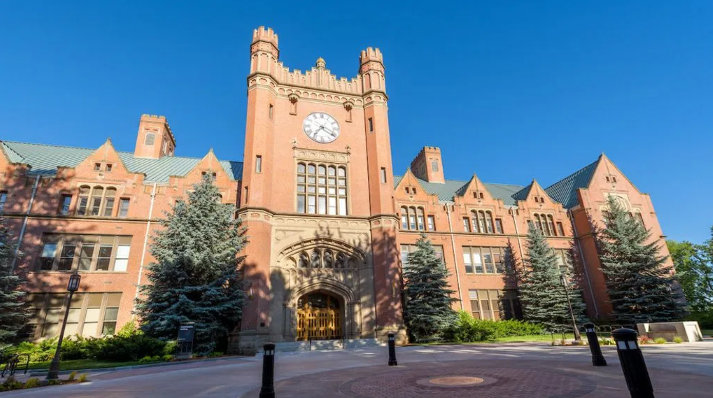

In [35]:
from PIL import Image

img_name = "images/UI.png"

# open and load the image object
with Image.open(img_name) as img:
    img.load()

# display the image
display(img)

We can print the type of an image object as in the following cell.

In [36]:
type(img)

PIL.PngImagePlugin.PngImageFile

### Save an image

The `save()` method saves an image by specifying a string with a name for the image file, which can also include the path for saving the image.

In [37]:
img.save("saved_img.png")

The following code prints the size and format of the image.

In [38]:
# print the format of the image
img.format

'PNG'

In [39]:
# print the width and height of the image in pixels
img.size

(713, 398)

### Channels and Mode of an Image

An image is a 2D grid of pixels, with each pixel denoting a specific color. 
The pixels can be defined using one or more values. In the case of an RGB image, 
each pixel is described by three values, representing its red, green, and blue components.
Consequently, an Image object for an RGB image comprises three `channels` or `bands`, 
each corresponding to a color component. 

For instance, in a 200x200-pixel RGB image, the representation is an array of 200 x 200 x 3 values.

An example of an RGB array is shown in the figure.

<img style="float: left; height:350px; width:auto" src="images/rgb.png">

In [40]:
# print the channels of a RGB image
img.getbands()

('R', 'G', 'B', 'A')

The `mode` specifies the type of an image. Pillow offers a broad range of standard modes, such as black-and-white (binary), grayscale, RGB, RGBA, and CMYK.

In [41]:
# print the mode of the image
img.mode

'RGBA'

To convert the RGB image into grayscale mode, we can use `convert("L")`.

In [42]:
# Convert to grayscale image
gray_img = img.convert("L")  
display(gray_img)

Show the bands of a grayscale mode image.

In [43]:
gray_img.getbands()

('L',)

### Split and Merge Channels

You can separate an image into its channels using `split()` and we can combine the separate channels back into an Image object using `merge()`. 

The `split()` method returns all the channels as separate Image objects. We can confirm this by displaying the mode of one of the returned objects.

In [44]:
# Split the channels
red, green, blue = img.split()[:3]
red.mode

'L'

The first argument in `merge()` determines the mode of the image that we want to create.
The second argument contains the individual channels that we want to merge into a single image.

In the next cell, the red channel is stored in the variable `red`, and it is a grayscale image with mode `'L'`.
To create an image showing only the red channel, we merge the red channel from the original image with green and blue channels that contain only zeros. And, to create a channel containing zeros everywhere, we use the `point()` method.

In [45]:
zeroed_band = red.point(lambda _: 0)
print('Show the red channel:')
red_merge = Image.merge("RGB", (red, zeroed_band, zeroed_band))
display(red_merge)

Show the red channel:


Show the green channel


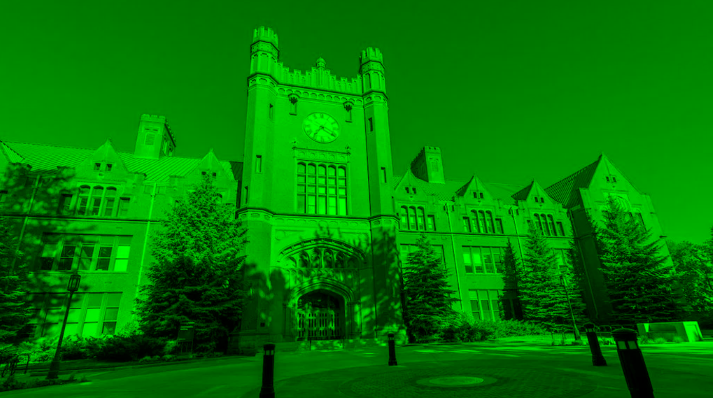

In [46]:
print('Show the green channel')
green_merge = Image.merge("RGB", (zeroed_band, green, zeroed_band))
display(green_merge)

In [47]:
print('Show the blue channel:')
blue_merge = Image.merge("RGB", (zeroed_band, zeroed_band, blue))
display(blue_merge)

Show the blue channel:


### Basic Image Manipulation

The `transpose()` method in Pillow allows to rotate or flip an image.

Options in the `transpose()` method include:

- `Image.FLIP_LEFT_RIGHT`: Flips the image left to right, resulting in a mirror image.
- `Image.FLIP_TOP_BOTTOM`: Flips the image top to bottom.
- `Image.ROTATE_90`: Rotates the image by 90 degrees counterclockwise.
- `Image.ROTATE_180`: Rotates the image by 180 degrees.
- `Image.ROTATE_270`: Rotates the image by 270 degrees counterclockwise, which is the same as 90 degrees clockwise.
- `Image.TRANSPOSE`: Transposes the rows and columns using the top-left pixel as the origin, with the top-left pixel being the same in the transposed image as in the original image.
- `Image.TRANSVERSE`: Transposes the rows and columns using the bottom-left pixel as the origin, with the bottom-left pixel being the one that remains fixed between the original and modified versions.

An example with `FLIP_TOP_BOTTOM`.

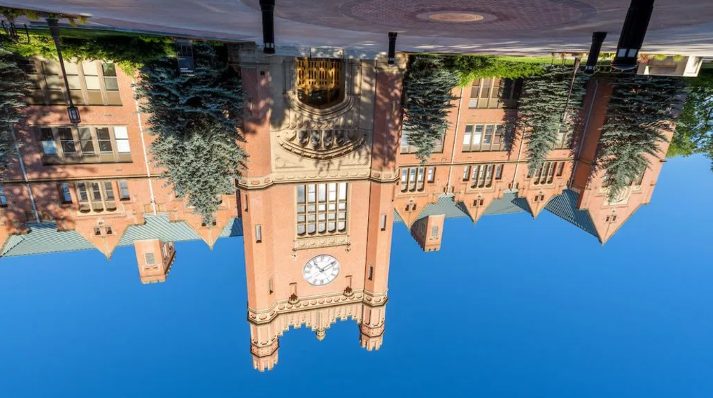

In [48]:
converted_img = img.transpose(Image.FLIP_TOP_BOTTOM)
display(converted_img)

Example of rotating the image for 60 degrees counterclockwise.

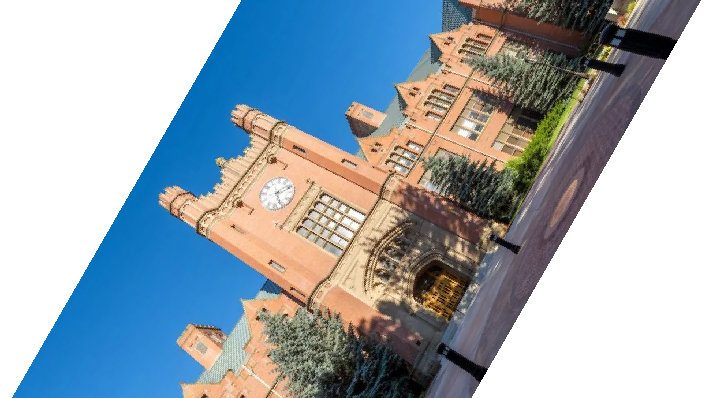

In [49]:
rotated_img = img.rotate(60)
display(rotated_img)

The Image object returned is the same size as the original Image. Therefore, the corners of the image are missing in the image displayed above. 

We can change this behavior with the parameter `expand` set to True.

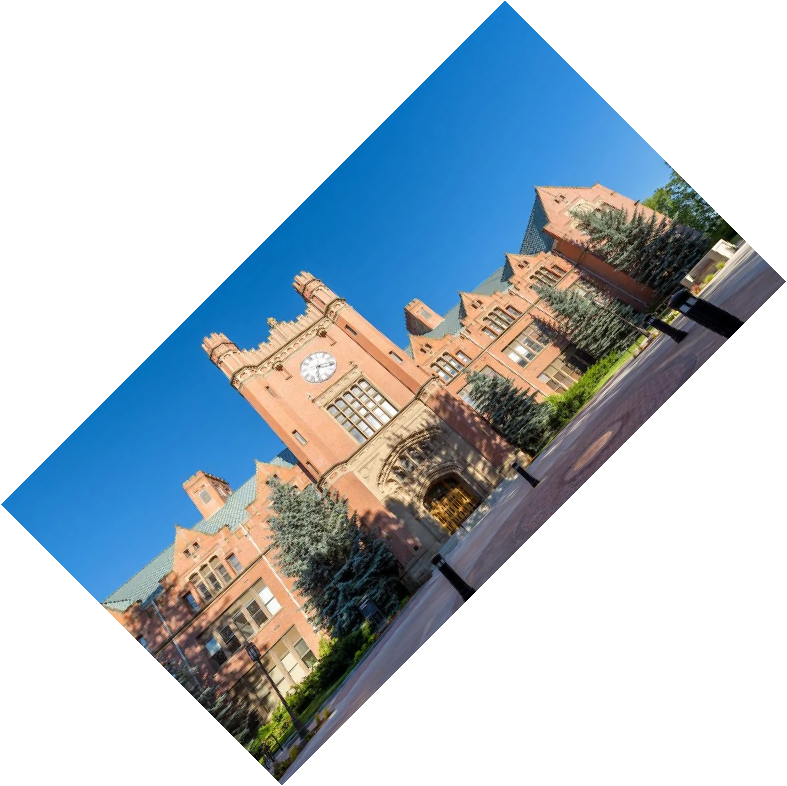

In [50]:
rotated_img = img.rotate(45, expand=True)
display(rotated_img)

### Crop and Resize Images

We can crop images using the `crop()` method. The arguments in `crop()` must comprise a 4 element tuple that defines the left, upper, right, and bottom edges of the region that we wish to crop. The coordinate system used in Pillow assigns the coordinates (0, 0) to the pixel in the upper-left corner. 

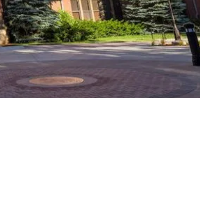

In [51]:
cropped_img = img.crop((400, 300, 600, 500))
display(cropped_img)

In [52]:
cropped_img.size

(200, 200)

To resize an image, we can change the resolution with the `resize()` method.
For instance, we can set the new width and height to half of their original values using the floor 
division operator (`//`) and the Image attributes `.width` and `.height`.

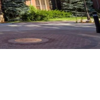

In [53]:
low_res_img = cropped_img.resize((cropped_img.width // 2, cropped_img.height // 2))
display(low_res_img)

### Image Blurring, Sharpening, and Smoothing

We can blur an image by using the `filter()` method and the `ImageFilter` module.

In [54]:
from PIL import ImageFilter
blur_img = img.filter(ImageFilter.BLUR)
display(blur_img)

More advanced blurring methods include:

- Gaussian Blur using `.GaussianBlur(factor)` method
- Box blur using `.BoxBlur(factor)` method

The argument in the blur methods determines how much blurring to apply. The larger the factor, the more blur is added to the image. 

In [55]:
print('BoxBlur method with factor of 5')
display(img.filter(ImageFilter.BoxBlur(5)))

BoxBlur method with factor of 5


In [56]:
print('BoxBlur method with factor of 20')
display(img.filter(ImageFilter.BoxBlur(20)))

BoxBlur method with factor of 20


GaussianBlur method with factor of 20


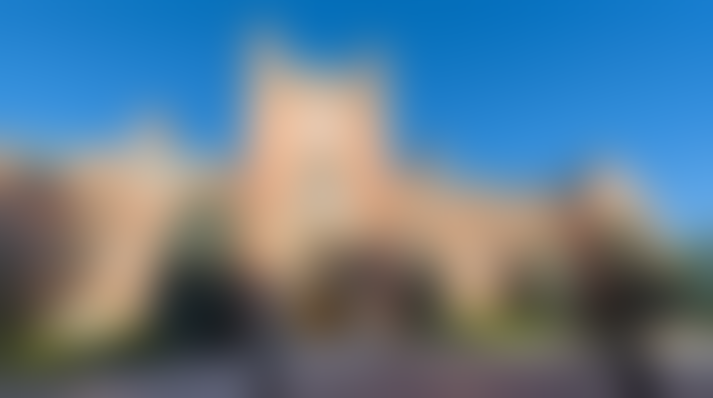

In [57]:
print('GaussianBlur method with factor of 20')
display(img.filter(ImageFilter.GaussianBlur(20)))

To sharpen an image, we can use the predefined filter `ImageFilter.SHARPEN`.

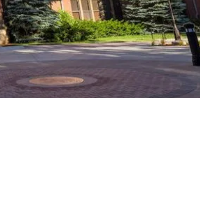

In [58]:
# original image
display(cropped_img)

In [59]:
# sharpened image
sharp_img = cropped_img.filter(ImageFilter.SHARPEN)
display(sharp_img)

Another more advanced sharpening method is with `ImageEnhance.Sharpness(factor)`. Applying sharpening with a factor greater than 1 applies a sharpening filter to the image, sharpening factor in the range from 0 to 1 blurs the image, and sharpening factor = 1 returns the original image.

In [60]:
from PIL import ImageEnhance
sharp_image =ImageEnhance.Sharpness(cropped_img).enhance(4)
display(sharp_image)

### Change Color, Brightness, Contrast

`ImageEnhance.Color(img).enhance(factor)` changes the color of the image, where factor > 1 means stronger color, factor < 1 reduces the color, and 0 means grayscale image.

`ImageEnhance.Color(im).Brightness(factor)` changes the brightness of the image, where factor > 1 makes the image brighter, factor < 1 makes it darker, and 0 means black image.

`ImageEnhance.Contrast(im).enhance(factor)` changes the contrast, where factor > 1 increases the brightness range, making light colors k-times lighter and dark colors darker. At very high contrast values, every pixel is either black or white, and generally only the basic shapes of the image are visible. Factor less than 1 decreases the brightness range, pulling all the colors towards a middle grey. A factor of 0 results in a completely grey image.

Change the color of an image.

In [61]:
# Make the color stronger
color_img = ImageEnhance.Color(img).enhance(5)
display(color_img)

In [62]:
# Make the color less strong
less_color_img = ImageEnhance.Color(img).enhance(0.5)
display(less_color_img)

Change the brightness of an image.

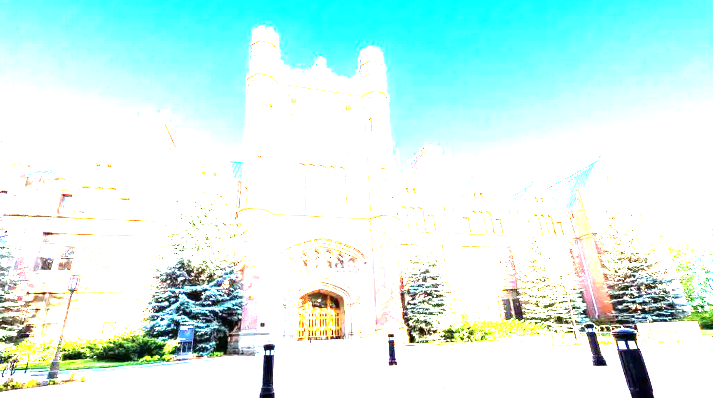

In [63]:
# Make the image brighter
brighter_img = ImageEnhance.Brightness(img).enhance(5)
display(brighter_img)

In [64]:
# Make the image darker
darker_img = ImageEnhance.Brightness(img).enhance(.5)
display(darker_img)

Change the contrast of an image.

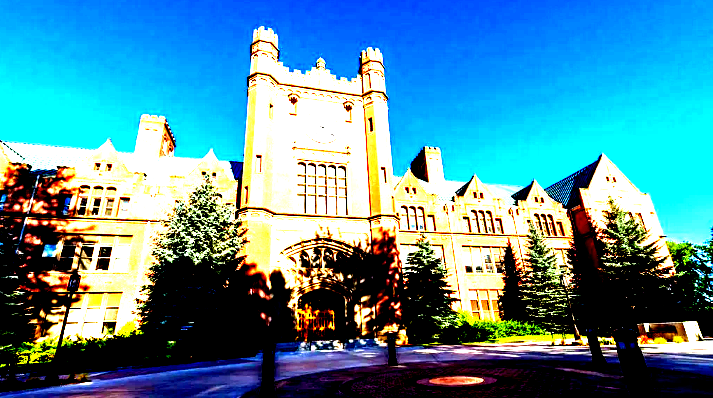

In [65]:
# Apply more contrast
contra_img = ImageEnhance.Contrast(img).enhance(5)
display(contra_img)

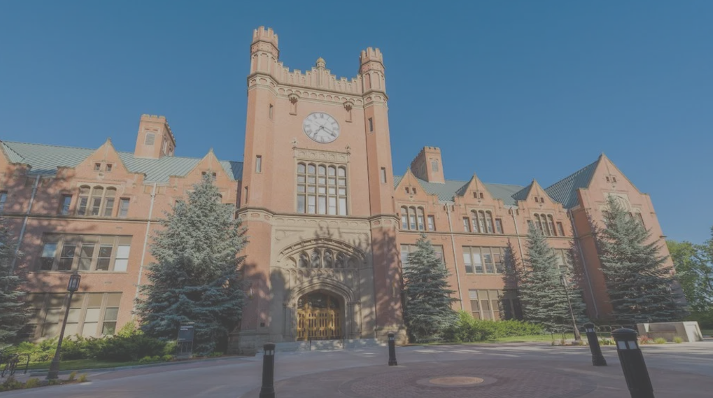

In [66]:
# Apply less contrast
less_contra_img = ImageEnhance.Contrast(img).enhance(.5)
display(less_contra_img)

### References:

1. "ELEC_ENG 420: Digital Image Processing | Electrical and Computer Engineering | Northwestern Engineering" available at [www.mccormick.northwestern.edu/electrical-computer/academics/courses/descriptions/420.html](www.mccormick.northwestern.edu/electrical-computer/academics/courses/descriptions/420.html).
2. "Image Processing With the Python Pillow Library," Real Python, available at [https://realpython.com/image-processing-with-the-python-pillow-library/](https://realpython.com/image-processing-with-the-python-pillow-library/).
3. "Python Pillow Tutorial," GeeksforGeeks, available at [https://www.geeksforgeeks.org/python-pillow-tutorial/](https://www.geeksforgeeks.org/python-pillow-tutorial/).

[BACK TO TOP](#top)